 #  Portfolios Metrics Analysis

 Performance evaluation of custom, algorithmic, hedge, and mutual fund portfolios to compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

## Whale Returns

The following are portfolios of Whale investors

In [5]:
# Reading whale returns
whale_returns_csv = Path("data/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [7]:
# Count nulls
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
whale_returns_df.dropna(axis = 0, how ='any',inplace=True)
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algorithmic_returns_csv = Path("CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/instructions/Resources/algo_returns.csv")
algorithmic_returns_df = pd.read_csv(algorithmic_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algorithmic_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algorithmic_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algorithmic_returns_df.dropna(axis = 0, how ='any',inplace=True)
algorithmic_returns_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/instructions/Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [13]:
# Check Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float64')
sp500_history_df.dtypes

Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
sp500_history_daily_returns = sp500_history_df.pct_change()
sp500_history_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [16]:
# Drop nulls
sp500_history_daily_returns.dropna(axis = 0, how ='any',inplace=True)
sp500_history_daily_returns.isna().sum()

Close    0
dtype: int64

In [17]:
# Rename Column
sp500_history_daily_returns.rename(columns={'Close':'S&P 500'}, inplace=True)
sp500_history_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Concatenate all DataFrames into a single DataFrame
joined_portfolios = pd.concat([whale_returns_df, algorithmic_returns_df, sp500_history_daily_returns], axis="columns", join="inner")
joined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

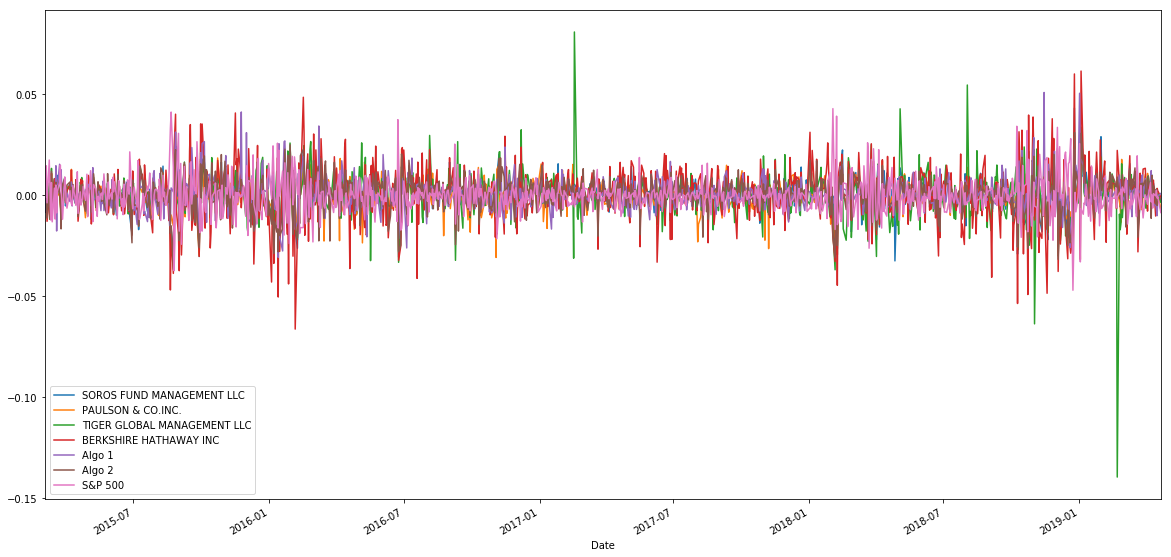

In [20]:
# Plot daily returns
joined_portfolios.plot(figsize=(20,10))

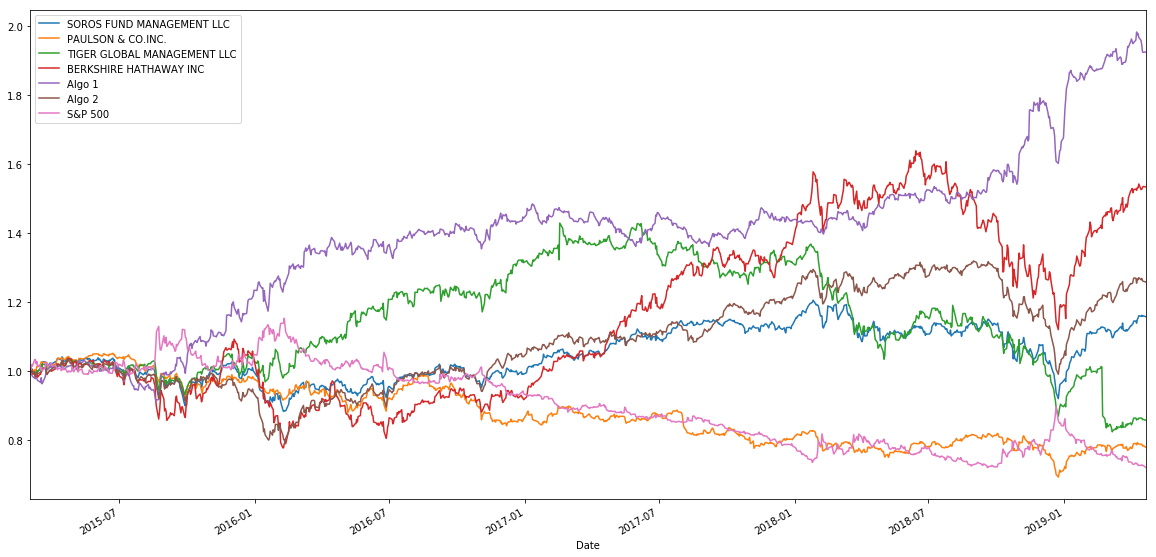

In [21]:
# Plot cumulative returns
cumulative_returns = (1 + joined_portfolios).cumprod()
cumulative_returns.plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

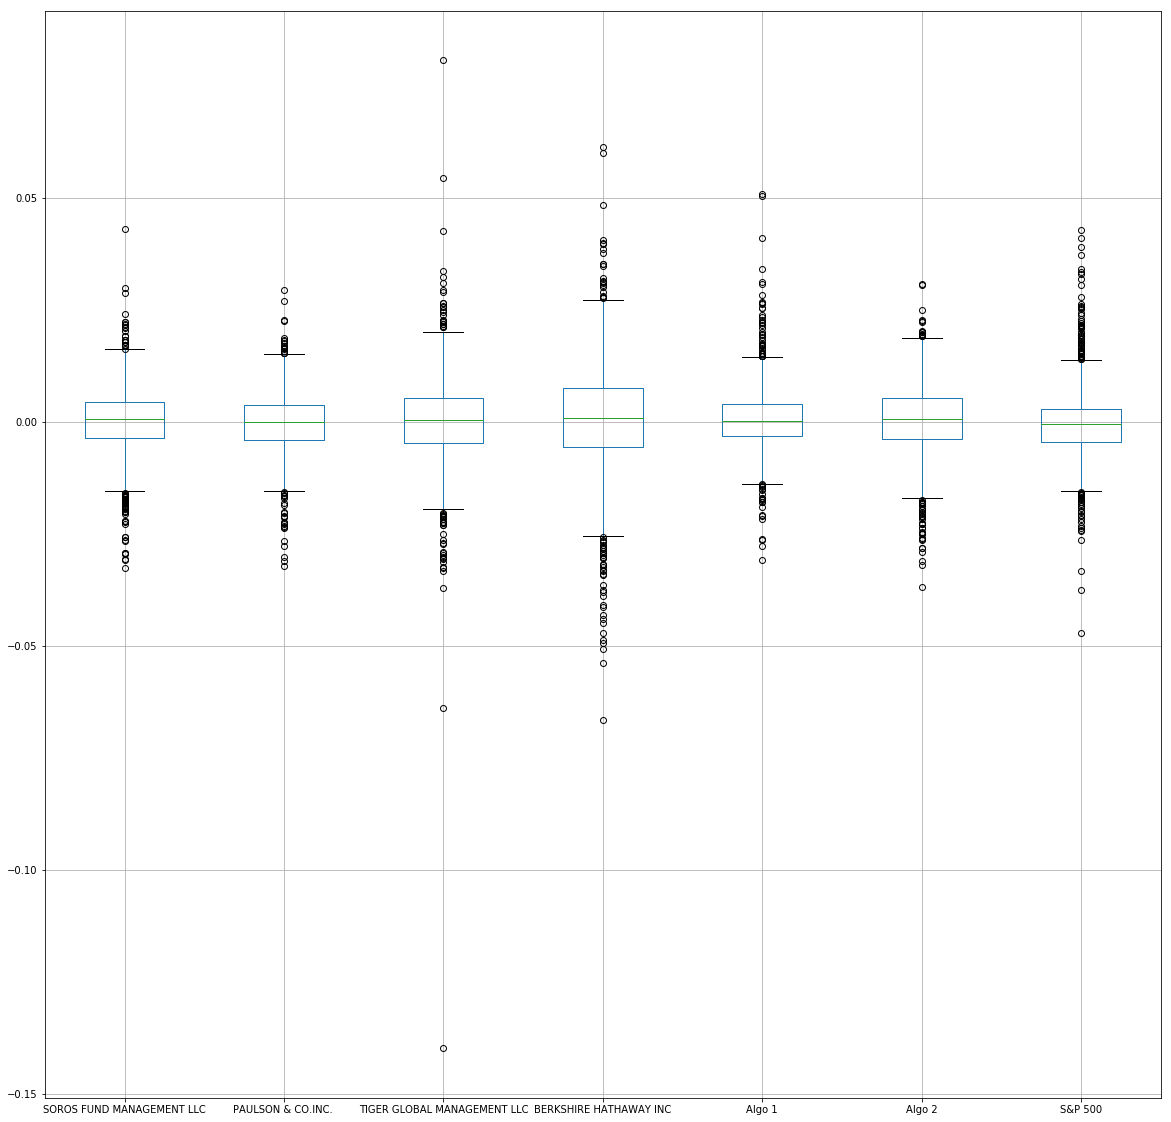

In [22]:
# Box plot to visually show risk
joined_portfolios.boxplot(figsize=(20,20))

In [23]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
portfolios_std = joined_portfolios.std()
print(portfolios_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64


In [24]:
# Determine which portfolios are riskier than the S&P 500
portfolios_std.gt(0.008587)

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [25]:
# Calculate the annualized standard deviation (252 trading days)
anualized_std = joined_portfolios.std() * np.sqrt(252)
print(anualized_std)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

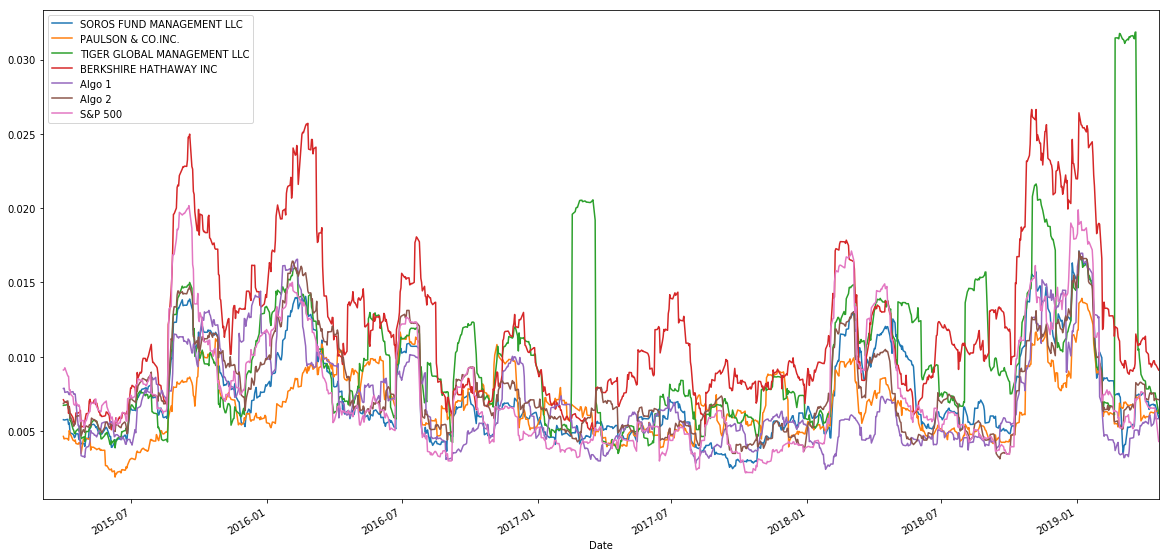

In [26]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
joined_portfolios_roll_std=joined_portfolios.rolling(21).std() 
joined_portfolios_roll_std.plot(figsize=(20,10))

In [27]:
# Correlation
correlation = joined_portfolios.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


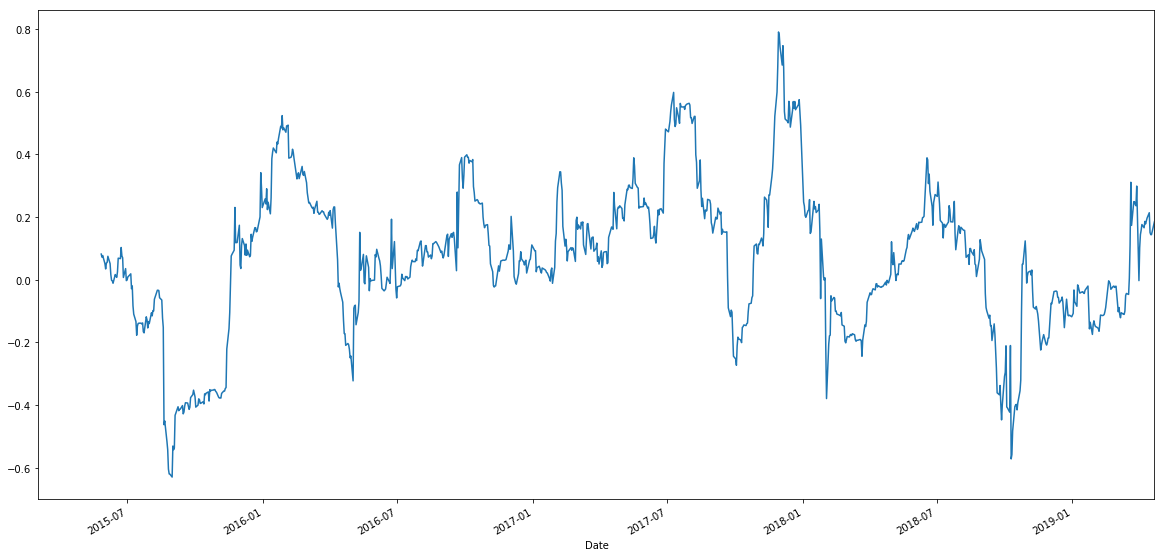

In [28]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance  = joined_portfolios["BERKSHIRE HATHAWAY INC"].rolling(60).cov(joined_portfolios['S&P 500'])
#rolling variance
var_sp500_60 = joined_portfolios['S&P 500'].rolling(60).var()
beta = covariance/var_sp500_60
beta.plot(figsize=(20,10))

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [29]:
start_date = '2015-03-03'
end_date = '2019-04-22'
ema_short = joined_portfolios.ewm(halflife=21).mean()

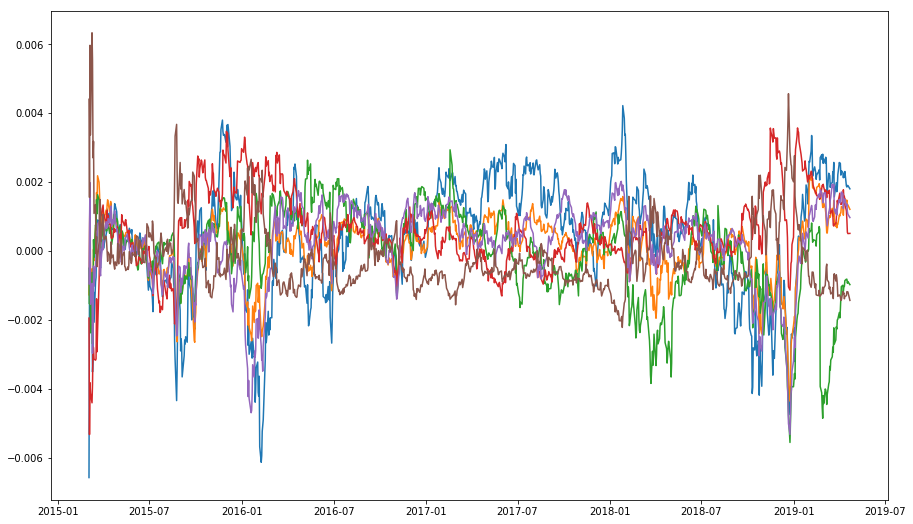

In [30]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'BERKSHIRE HATHAWAY INC'])
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'SOROS FUND MANAGEMENT LLC'])
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'TIGER GLOBAL MANAGEMENT LLC'])
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Algo 1'],)
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Algo 2'])
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'S&P 500'])

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [31]:
# Annualzied Sharpe Ratios
sharpe_ratios = (joined_portfolios.mean() * 252) / (joined_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

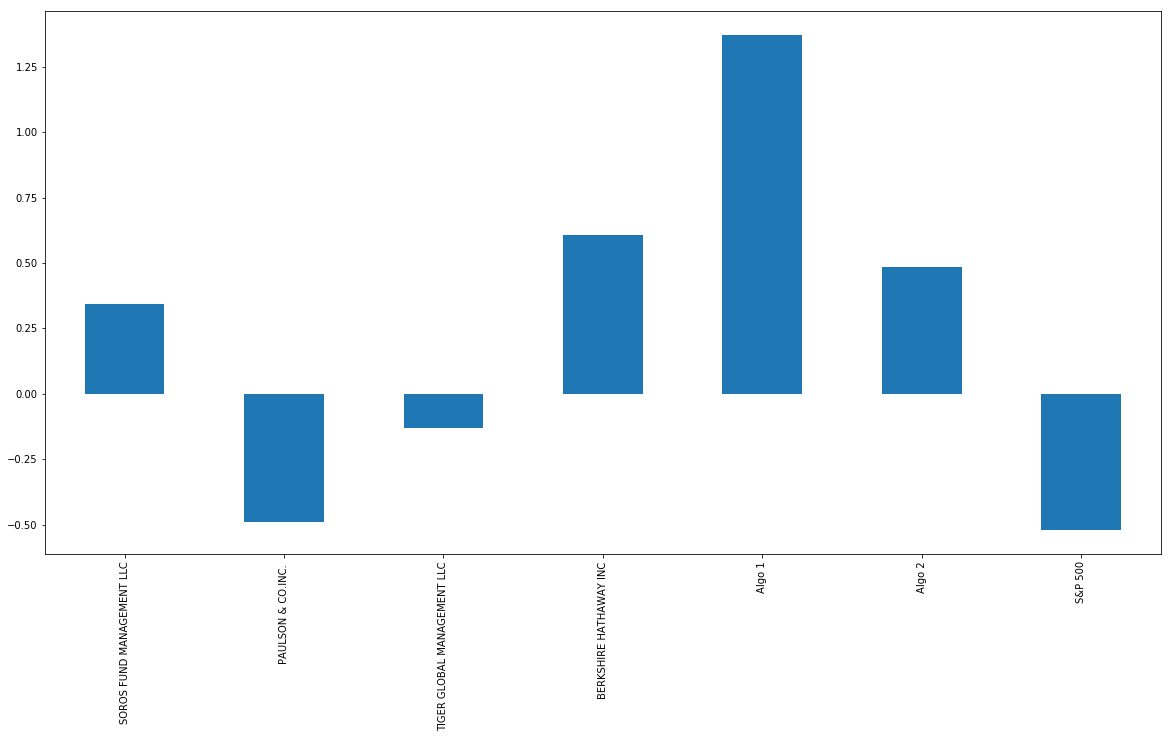

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(20,10))

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Read the first stock
amazon_csv = Path("CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/Instructions/Resources/AMZN.csv")
amazon_df = pd.read_csv(amazon_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
amazon_df = amazon_df.drop(['Open', 'High',"Low","Close","Volume"], axis=1)
amazon_df['Symbol'] = 'AMZN'
amazon_df.head()

,Adj Close,Symbol
Date,,
2015-03-02,385.660004,AMZN
2015-03-03,384.609985,AMZN
2015-03-04,382.720001,AMZN
2015-03-05,387.829987,AMZN
2015-03-06,380.089996,AMZN


In [34]:
# Read the second stock
google_csv = Path("CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/Instructions/Resources/GOOG.csv")
google_df = pd.read_csv(google_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
google_df = google_df.drop(['Open', 'High',"Low","Close","Volume"], axis=1)
google_df['Symbol'] = 'GOOG'
google_df.head()

,Adj Close,Symbol
Date,,
2015-03-02,569.775696,GOOG
2015-03-03,572.069397,GOOG
2015-03-04,571.800110,GOOG
2015-03-05,573.754761,GOOG
2015-03-06,566.130676,GOOG


In [35]:
# Read the third stock
ibm_csv = Path("CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/Instructions/Resources/IBM.csv")
ibm_df = pd.read_csv(ibm_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
ibm_df = ibm_df.drop(['Open', 'High',"Low","Close","Volume"], axis=1)
ibm_df['Symbol'] = 'IBM'
ibm_df.head()

,Adj Close,Symbol
Date,,
2015-03-02,131.763123,IBM
2015-03-03,132.214706,IBM
2015-03-04,130.892807,IBM
2015-03-05,132.337845,IBM
2015-03-06,130.137436,IBM


In [36]:
# Read the 4th stock
materion_corp_csv = Path("CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/Instructions/Resources/MTRN.csv")
materion_corp_df = pd.read_csv(materion_corp_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
materion_corp_df = materion_corp_df.drop(['Open', 'High',"Low","Close","Volume"], axis=1)
materion_corp_df['Symbol'] = 'MTRN'
materion_corp_df.head()

,Adj Close,Symbol
Date,,
2015-03-02,35.441666,MTRN
2015-03-03,35.193085,MTRN
2015-03-04,34.915817,MTRN
2015-03-05,35.298252,MTRN
2015-03-06,34.686367,MTRN


In [37]:
# Read the 5th stock
union_pacific_corp_csv = Path("CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/Instructions/Resources/UNP.csv")
union_pacific_corp_df = pd.read_csv(union_pacific_corp_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
union_pacific_corp_df = union_pacific_corp_df.drop(['Open', 'High',"Low","Close","Volume"], axis=1)
union_pacific_corp_df['Symbol'] = 'UNP'
union_pacific_corp_df.head()

,Adj Close,Symbol
Date,,
2015-03-02,108.834686,UNP
2015-03-03,106.770653,UNP
2015-03-04,106.545303,UNP
2015-03-05,106.653481,UNP
2015-03-06,104.958977,UNP


In [38]:
# Concatenate all stocks into a single DataFrame
custom_portfolio = pd.concat([amazon_df,google_df,ibm_df,materion_corp_df,union_pacific_corp_df], axis="rows", join="inner")
custom_portfolio.head()

,Adj Close,Symbol
Date,,
2015-03-02,385.660004,AMZN
2015-03-03,384.609985,AMZN
2015-03-04,382.720001,AMZN
2015-03-05,387.829987,AMZN
2015-03-06,380.089996,AMZN


In [39]:
custom_portfolio.isna().sum()

Adj Close    0
Symbol       0
dtype: int64

In [40]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
custom_portfolio = custom_portfolio.pivot(columns='Symbol', values='Adj Close')
custom_portfolio.head()

Symbol,AMZN,GOOG,IBM,MTRN,UNP
Date,,,,,
2015-03-02,385.660004,569.775696,131.763123,35.441666,108.834686
2015-03-03,384.609985,572.069397,132.214706,35.193085,106.770653
2015-03-04,382.720001,571.800110,130.892807,34.915817,106.545303
2015-03-05,387.829987,573.754761,132.337845,35.298252,106.653481
2015-03-06,380.089996,566.130676,130.137436,34.686367,104.958977


In [41]:
# Drop Nulls
daily_returns_custom_portfolio = custom_portfolio.pct_change()
daily_returns_custom_portfolio.dropna(axis = 0, how ='any',inplace=True)
daily_returns_custom_portfolio.isna().sum()

Symbol
AMZN    0
GOOG    0
IBM     0
MTRN    0
UNP     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Calculate weighted portfolio returns

weights = [1/5,1/5,1/5,1/5,1/5]
custom_portfolio_returns = daily_returns_custom_portfolio.dot(weights)
custom_portfolio_returns.head()

Date
2015-03-03   -0.004250
2015-03-04   -0.005074
2015-03-05    0.007956
2015-03-06   -0.016619
2015-03-09    0.006408
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [52]:
all_portfolios = pd.concat([joined_portfolios, custom_portfolio_returns], axis="columns", join="inner")
all_portfolios.rename( columns={0 :'Custom'}, inplace=True )
all_portfolios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.001384
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.006088
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.000484
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.007951
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.000292


In [44]:
# Only compare dates where the new, custom portfolio has dates


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [53]:
# Risk
anualized_std = all_portfolios.std() 
print(anualized_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
Custom                         0.011533
dtype: float64


In [54]:
anualized_std.gt(0.011533)

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
Custom                          True
dtype: bool

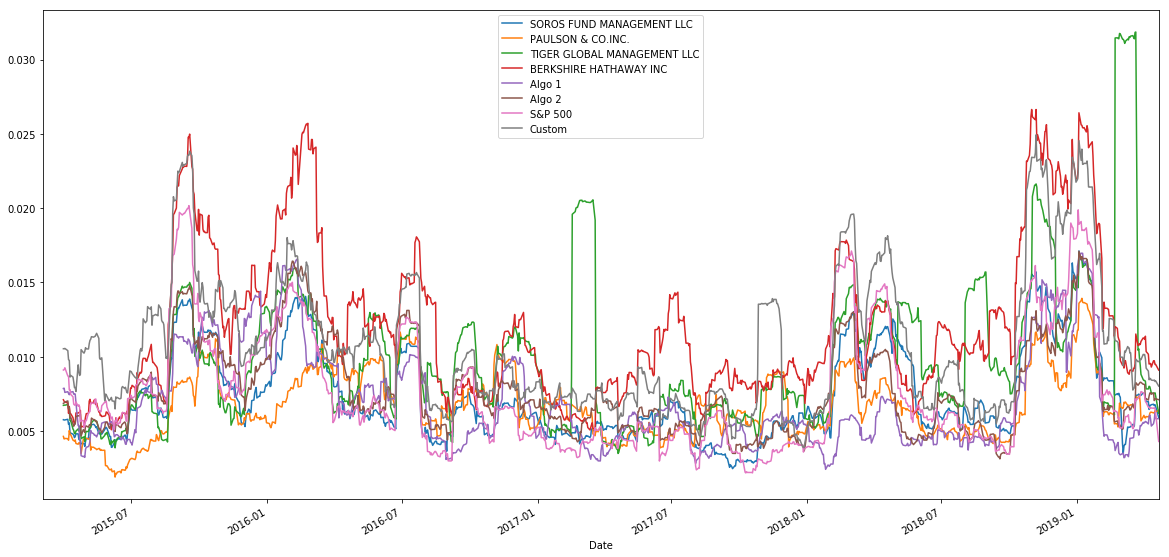

In [55]:
# Rolling
all_portfolios_roll_std=all_portfolios.rolling(21).std() 
all_portfolios_roll_std.plot(figsize=(20,10))

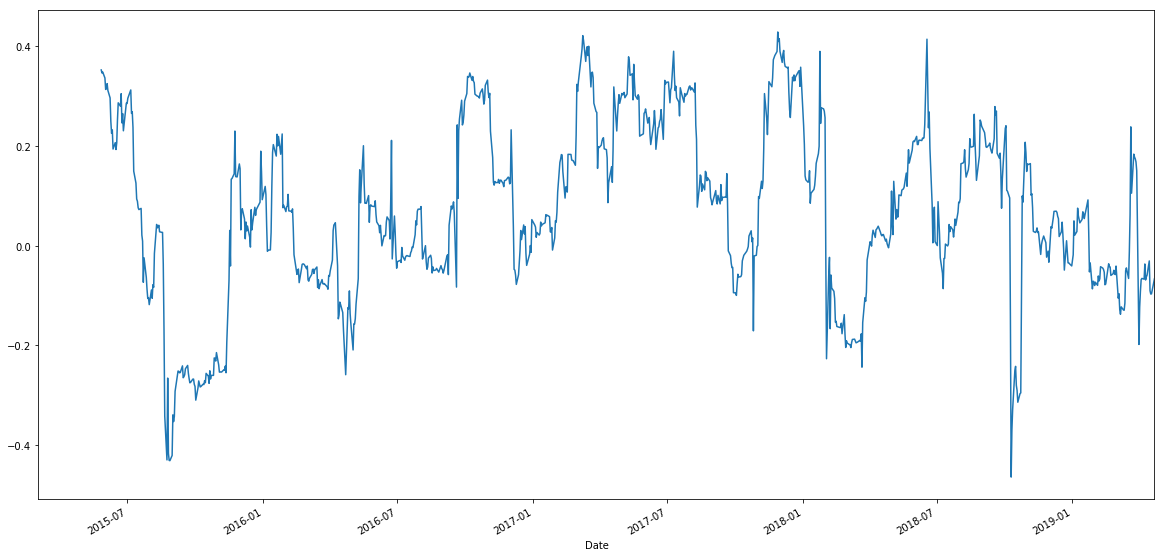

In [56]:
# Beta
covariance_all_portfolios_rolling  = all_portfolios["Custom"].rolling(60).cov(all_portfolios['S&P 500'])
var_sp500_60 = all_portfolios['S&P 500'].rolling(60).var()
rolling_beta_custom = covariance_all_portfolios_rolling/var_sp500_60
rolling_beta_custom.plot(figsize=(20,10))

In [57]:
# Annualzied Sharpe Ratios
sharpe_ratios_with_custom =(all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios_with_custom

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
Custom                         1.084298
dtype: float64

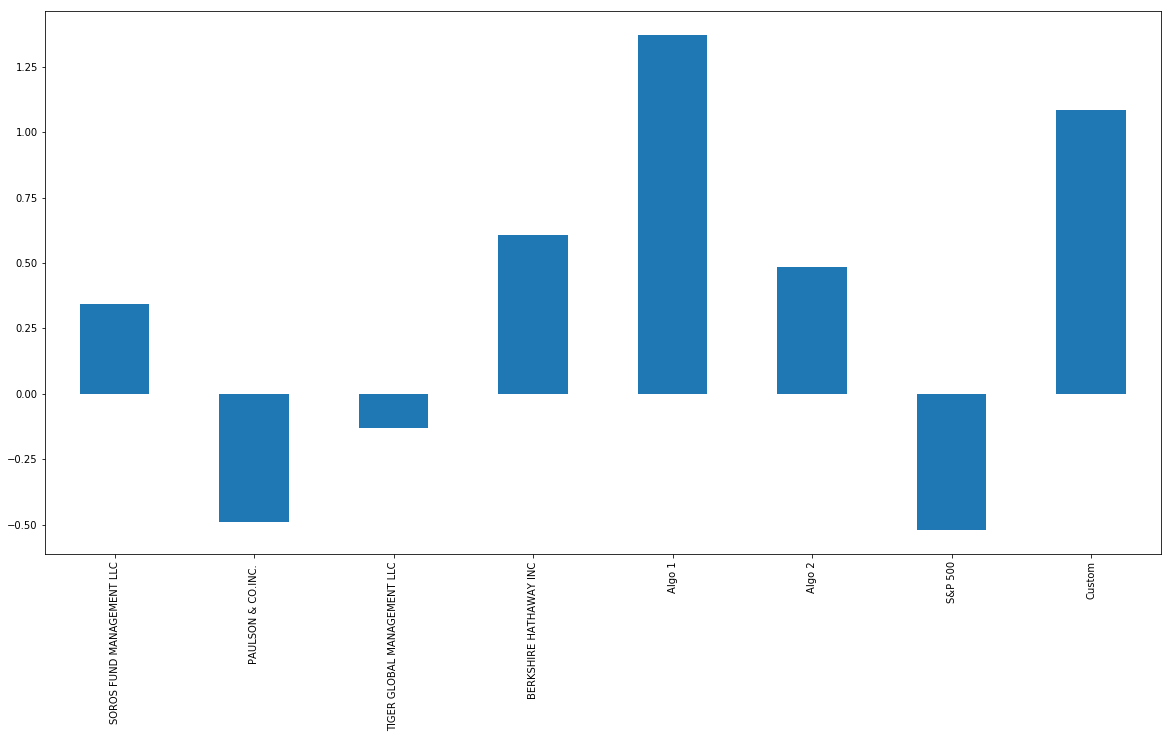

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_with_custom.plot.bar(figsize=(20,10))

## Include correlation analysis to determine which stocks (if any) are correlated

In [51]:
correlation = all_portfolios.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.723496
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.530115
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,0.477777
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.701662
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.279725
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,0.755151
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,-0.011581
Custom,0.723496,0.530115,0.477777,0.701662,0.279725,0.755151,-0.011581,1.000000
